# Data analysis for Almentor Facebook Data 

### read required libraries

In [1]:
import pandas as pd
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

## Read and optemize files

#### reading text data file

In [2]:
## open the file and read it 
with open("C:\\Users\\20812018100700\\working\\work\\rd_part\\result_full.txt", encoding='utf-8')as f:
    result = f.read()

In [3]:
## split .txt file 
result = re.split("done [0-9$,.%]+\d*\n", result)

#### reading orignal data frame

In [4]:
## read DataFrame
df = pd.read_csv("C:\\Users\\20812018100700\\working\\work\\rd_part\\test2_data.csv")

In [5]:
## drop null values
df = df[df["message"].notnull()]

In [6]:
## reset the index of DF
df.reset_index(drop=True, inplace=True)

In [7]:
## slice the DF to the len of our data
df = df.iloc[:len(result), :]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   created_time  15200 non-null  object
 1   message       15200 non-null  object
 2   id            15200 non-null  object
 3   from          91 non-null     object
dtypes: object(4)
memory usage: 475.1+ KB


### extract values from text file

In [8]:
## store values in dict 
data = {
        "Translate": [],
        "is_human" : [],
        "sentment" : [],
        "positive" : [], 
        "neutral"  : [],
        "negative" : []
        }

In [9]:
## loop for each value in result list extract is_human 
## if not human: will extract the Translation, Sentment overall rank, sentment score
## else the sentment is nutral/no translation
for i in range(len(result)): 
    iz = re.search('(?<=is human: )(.*)', result[i]).groups()[0]
    data["is_human"].append(iz[0])
    if (iz == "True"):
        data["sentment"].append("neutral")
        data["Translate"].append(result[i].split(" \n\n")[0])
        h = ['positive=0.00', 'neutral=1.00', 'negative=0.00 ']
        for j in h:
            s = j.split("=")
            data[s[0]].append(s[1])        
                                   
    else:                          
        m = re.search('(?<=Document Sentiment: )(.*)', result[i]).groups()
        data["sentment"].append(m[0])
        
        n = re.search('(?<=Translate: )(.*)', result[i]).groups()
        data["Translate"].append(n[0])
        
        h = str(re.search('(?<=Overall scores: )(.*)', result[i]).groups()[0]).split("; ")
        for j in h:
            s = j.split("=")
            data[s[0]].append(s[1])
        

In [10]:
## convert dict to dataFrame
df1= pd.DataFrame(data)
df1.sample(10)

,Translate,is_human,sentment,positive,neutral,negative
6015,can i change any of the black hat personality ...,F,neutral,0.01,0.99,0.00
3455,📗,F,neutral,0.13,0.81,0.06
5952,Languages,F,neutral,0.14,0.82,0.04
11592,Sister is very excellent in explaining and sim...,F,positive,1.00,0.00,0.00
5102,Sara Galal Noweir Marwaa Waheed,T,neutral,0.00,1.00,0.00
11908,A,F,neutral,0.30,0.64,0.06
7381,take place,F,neutral,0.14,0.84,0.02
11560,how much is the price and for how long,F,neutral,0.02,0.97,0.01
1642,Mohamed Dafalla,T,neutral,0.00,1.00,0.00
6176,Peace be upon you and God's mercy and blessings,F,positive,0.84,0.02,0.14


### merge the 2 dataframes to 1 df

In [11]:
## merge 2 dataFrames into the index
ndf = pd.merge(df, df1, left_index=True, right_index=True)
ndf.head(25)

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative
0,2021-08-30T18:45:14+0000,من فضلك عاوزة أسأل عن الكورس بتاع دكتور حنان ر...,1909076255920699_1909102692584722,NaN,"Please, I want to ask about dr. Hanan Radwan's...",F,neutral,0.05,0.92,0.03
1,2021-08-26T18:14:24+0000,ممكن معلومات عن المسابقة,1905738672921124_1905795872915404,NaN,Can I get information about the contest?,F,neutral,0.01,0.98,0.01
2,2021-08-28T21:14:33+0000,مبروووك,1905738672921124_1907514736076851,NaN,Congratulations,F,positive,0.57,0.39,0.04
3,2021-08-27T20:36:52+0000,مشاركه حلوة وناس فوق الممتازه كانو في المسابقه...,1905738672921124_1906692159492442,NaN,Nice participation and people above the excell...,F,positive,1.00,0.00,0.00
4,2021-08-27T19:32:24+0000,ممكن تفاصيل,1905738672921124_1906660966162228,NaN,Can I have details,F,neutral,0.01,0.98,0.01
5,2021-08-26T17:05:00+0000,حاجة عظيمة,1905738672921124_1905753419586316,NaN,Great thing,F,positive,1.00,0.00,0.00
6,2021-08-26T03:14:07+0000,Dania Xina Mahariq,1905016969659961_1905233889638269,NaN,Dania Xina Mahariq,T,neutral,0.00,1.00,0.00
7,2021-08-27T00:40:48+0000,Sara Yassin,1905016969659961_1905994712895520,NaN,Sara Yassin,T,neutral,0.00,1.00,0.00
8,2021-08-27T00:40:36+0000,Eman Nour,1905016969659961_1905994639562194,NaN,Eman Nour,T,neutral,0.00,1.00,0.00
9,2021-08-26T11:52:27+0000,تفاصيل,1905016969659961_1905550172939974,NaN,Details,F,neutral,0.13,0.82,0.05


#### save dataframe to .csv file

In [12]:
ndf.to_csv("concatnated_DF", index=False)

# read the data again

In [39]:
ndf = pd.read_csv("C:\\Users\\20812018100700\\working\\work\\rd_part\\concatnated_DF.csv")

#### explore some data

In [40]:
## extract date from created_time
ndf["created_time"] = ndf["created_time"].str.slice(0, 7)
ndf["created_time"]

0        2021-08
1        2021-08
2        2021-08
3        2021-08
4        2021-08
          ...   
15195    2020-04
15196    2020-04
15197    2020-04
15198    2020-04
15199    2020-04
Name: created_time, Length: 15200, dtype: object

In [41]:
ndf.is_human.unique()

array(['F', 'T', 'N'], dtype=object)

In [16]:
ndf.query('is_human =="N" and sentment == "negative"').sample(10)

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,date
5137,2021-02-01,Soha Elsrogy \nAbdallah Elsrogy,1751145495047110_1751201481708178,NaN,Never Elsrogy,N,negative,0.07,0.26,0.67,2021-02-01
4570,2021-02-01,يؤثر القائد على مرؤوسه لتحقيق هدف محدد ، في حي...,1754412824720377_1756008651227461,NaN,A leader influences his subordinate to achieve...,N,negative,0.01,0.04,0.95,2021-02-01
468,2021-06-01,انا ٢١ سنه ودماغي انتحرت قبل اخر مادة,1850574868437505_1850705538424438,NaN,I am 21 years old and my brain committed suici...,N,negative,0.00,0.00,1.00,2021-06-01
2663,2021-04-01,Kero Hero mesh 3arfa eh dah bs shoof,1768718659956460_1809417009219958,NaN,Kero Hero mesh 3arfa eh dah bs shoof,N,negative,0.02,0.12,0.86,2021-04-01
14214,2020-05-01,متتعبيش نفسك اللي من جواه من ناوي علي التغيير ...,1506687169492945_1506988362796159,NaN,"Don't tire yourself, whoever is inside of him ...",N,negative,0.26,0.07,0.67,2020-05-01
6924,2020-12-01,كيف استغل فرصة العمل من المنزل في تطوير نفسي ب...,152036353025392_152058173023210,NaN,How to take advantage of the opportunity to wo...,N,negative,0.00,0.00,1.00,2020-12-01
178,2021-07-01,مش ده العرض اللي كنا مستنينه,1871826116312380_1872170042944654,NaN,this is not the offer we were waiting for,N,negative,0.01,0.23,0.76,2021-07-01
1295,2021-04-01,انا دفعت من خلال فودافون كاش ومش بيكمل معايا و...,1809328525895473_1809609132534079,NaN,I paid through Vodafone Cash and it does not c...,N,negative,0.00,0.00,1.00,2021-04-01
6084,2021-01-01,الله يرحمهم برحمته الواسعة انشا الله,1735494973278829_1737136013114725,NaN,May Allah have mercy on them with his wide mer...,N,negative,0.19,0.05,0.76,2021-01-01
4483,2021-02-01,العند وعدم سماع الكلام,1755766847918308_1755829301245396,NaN,Being an anthree and not hearing the words,N,negative,0.01,0.07,0.92,2021-02-01


## explore and fix the data

In [ ]:
## drop unused col
ndf.drop("from", axis=1, inplace = True)

In [44]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_time  15200 non-null  object 
 1   message       15200 non-null  object 
 2   id            15200 non-null  object 
 3   Translate     15194 non-null  object 
 4   is_human      15200 non-null  object 
 5   sentment      15200 non-null  object 
 6   positive      15200 non-null  float64
 7   neutral       15200 non-null  float64
 8   negative      15200 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.0+ MB


In [45]:
ndf["created_time"] = ndf["created_time"].str.slice(0, 7)
ndf["created_time"] = pd.to_datetime(ndf["created_time"])
ndf["date"] = ndf["created_time"].dt.date
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_time  15200 non-null  datetime64[ns]
 1   message       15200 non-null  object        
 2   id            15200 non-null  object        
 3   Translate     15194 non-null  object        
 4   is_human      15200 non-null  object        
 5   sentment      15200 non-null  object        
 6   positive      15200 non-null  float64       
 7   neutral       15200 non-null  float64       
 8   negative      15200 non-null  float64       
 9   date          15200 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 1.2+ MB


In [46]:
ndf.query('date == datetime.date(2021, 9, 1)')

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
17,2021-09-01,فكرة الكورس عظيمة. ❤,1902281406600184_1910505589111099,The idea of the course is great. ❤,F,positive,1.0,0.0,0.0,2021-09-01


In [47]:
ndf.drop(index=17, inplace = True)

In [48]:
ndf.reset_index(drop=True, inplace=True)

In [49]:
ndf.sentment.unique()

array(['neutral', 'positive', 'negative', 'mixed'], dtype=object)

In [50]:
## convert rate ti float
ndf["positive"] = ndf["positive"].astype('float')
ndf["neutral"] = ndf["neutral"].astype('float')
ndf["negative"] = ndf["negative"].astype('float')

In [51]:
## checking distripution of the rate
ndf.positive.describe()

count    15199.000000
mean         0.199416
std          0.329842
min          0.000000
25%          0.000000
50%          0.030000
75%          0.160000
max          1.000000
Name: positive, dtype: float64

In [52]:
ndf.negative.describe()

count    15199.000000
mean         0.087078
std          0.226602
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max          1.000000
Name: negative, dtype: float64

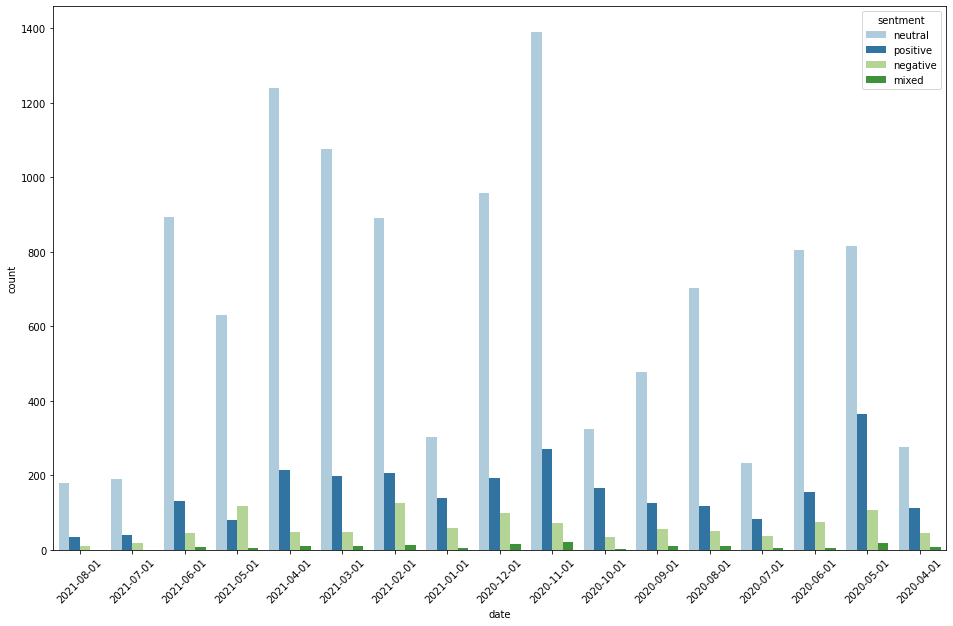

In [53]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = ndf, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)

## select non-human comments

In [54]:
## select not human data to explore
info_df = ndf.query('is_human != "T"')
print(info_df.info())
info_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10561 entries, 0 to 15198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_time  10561 non-null  datetime64[ns]
 1   message       10561 non-null  object        
 2   id            10561 non-null  object        
 3   Translate     10555 non-null  object        
 4   is_human      10561 non-null  object        
 5   sentment      10561 non-null  object        
 6   positive      10561 non-null  float64       
 7   neutral       10561 non-null  float64       
 8   negative      10561 non-null  float64       
 9   date          10561 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 907.6+ KB
None


,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
0,2021-08-01,من فضلك عاوزة أسأل عن الكورس بتاع دكتور حنان ر...,1909076255920699_1909102692584722,"Please, I want to ask about dr. Hanan Radwan's...",F,neutral,0.05,0.92,0.03,2021-08-01
1,2021-08-01,ممكن معلومات عن المسابقة,1905738672921124_1905795872915404,Can I get information about the contest?,F,neutral,0.01,0.98,0.01,2021-08-01
2,2021-08-01,مبروووك,1905738672921124_1907514736076851,Congratulations,F,positive,0.57,0.39,0.04,2021-08-01
3,2021-08-01,مشاركه حلوة وناس فوق الممتازه كانو في المسابقه...,1905738672921124_1906692159492442,Nice participation and people above the excell...,F,positive,1.00,0.00,0.00,2021-08-01
4,2021-08-01,ممكن تفاصيل,1905738672921124_1906660966162228,Can I have details,F,neutral,0.01,0.98,0.01,2021-08-01


In [55]:
## select non natural comments
info_df = ndf.query('neutral <0.5')
info_df.reset_index(drop=True, inplace=True)
print(info_df.info())
info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3848 entries, 0 to 3847
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_time  3848 non-null   datetime64[ns]
 1   message       3848 non-null   object        
 2   id            3848 non-null   object        
 3   Translate     3844 non-null   object        
 4   is_human      3848 non-null   object        
 5   sentment      3848 non-null   object        
 6   positive      3848 non-null   float64       
 7   neutral       3848 non-null   float64       
 8   negative      3848 non-null   float64       
 9   date          3848 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 300.8+ KB
None


,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
0,2021-08-01,مبروووك,1905738672921124_1907514736076851,Congratulations,F,positive,0.57,0.39,0.04,2021-08-01
1,2021-08-01,مشاركه حلوة وناس فوق الممتازه كانو في المسابقه...,1905738672921124_1906692159492442,Nice participation and people above the excell...,F,positive,1.00,0.00,0.00,2021-08-01
2,2021-08-01,حاجة عظيمة,1905738672921124_1905753419586316,Great thing,F,positive,1.00,0.00,0.00,2021-08-01
3,2021-08-01,Nice course and thanks for the good service ❤️,1894442890717369_1902326146595710,Nice course and thanks for the good service ❤️,F,positive,1.00,0.00,0.00,2021-08-01
4,2021-08-01,هل الكورس دة ينفع للاطفال سن ١١ سنه,1894442890717369_1897570790404579,Is this course suitable for 11-year-olds?,F,positive,0.70,0.28,0.02,2021-08-01


In [56]:
info_df.positive.describe()

count    3848.000000
mean        0.633087
std         0.399411
min         0.000000
25%         0.200000
50%         0.830000
75%         0.990000
max         1.000000
Name: positive, dtype: float64

In [57]:
info_df.negative.describe()

count    3848.000000
mean        0.272497
std         0.388175
min         0.000000
25%         0.000000
50%         0.030000
75%         0.590000
max         1.000000
Name: negative, dtype: float64

Text(0, 0.5, 'value')

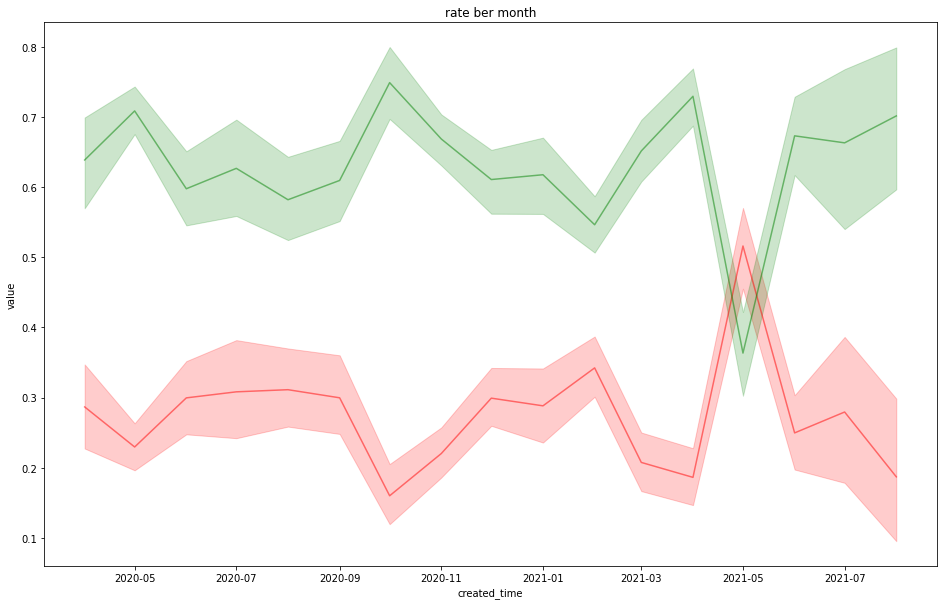

In [58]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=info_df, x="created_time", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=info_df, x="created_time", y="positive", color = "g", alpha = 0.5)
plt.title('rate ber month')
plt.ylabel("value")

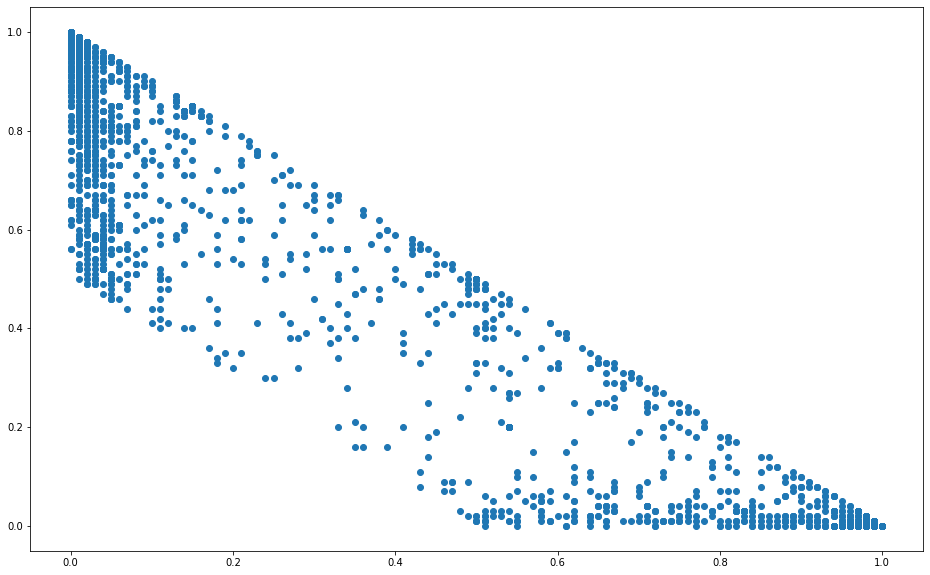

In [59]:
fig, plot = plt.subplots(figsize = (16,10))
plt.scatter(x = info_df["negative"], y =info_df["positive"] )

##### the corelation between positivity and negativity is linear :O 

### lets check what happen in 5/2021

In [60]:
negative_df = info_df.query('date == datetime.date(2021, 5, 1) and sentment == "negative"')
negative_df.sample(10)

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
566,2021-05-01,رجاء المشاركه في حمله مقاطعه Facebook بدايه من...,1778872888941037_1826735247488134,Please participate in the campaign of boycotti...,F,negative,0.00,0.00,1.00,2021-05-01
196,2021-05-01,🇵🇸نصرة لفلسطين \n*كيف نرد على الفيس بوك المتح...,1820433051451687_1823293397832319,🇵🇸Series for Palestine,F,negative,0.00,0.04,0.96,2021-05-01
229,2021-05-01,انسخوه بالعلم ياجماعه قبل ميحذفوه \n\n#GazaUnd...,1820433051451687_1823951607766498,Copy it with the flag people before they Delet...,F,negative,0.01,0.03,0.96,2021-05-01
306,2021-05-01,#GazaUnderAttack,1820433051451687_1821076068054052,#GazaUnderAttack,F,negative,0.03,0.14,0.83,2021-05-01
226,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979551397037,"Please don't sleep tonight, Gaza is sweeping. ...",F,negative,0.03,0.15,0.82,2021-05-01
291,2021-05-01,#GazaUnderAttack \n#savesheikhjarrah \n#palest...,1820433051451687_1822139181281074,#GazaUnderAttack,F,negative,0.04,0.30,0.66,2021-05-01
630,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482867613372,🇵🇸✌️🇲🇦,F,negative,0.05,0.08,0.87,2021-05-01
205,2021-05-01,ليه لما بدفع بيقولي خطا مش عارف حتي اشتري الكورس,1820433051451687_1834150056746653,why when i pay he tells me wrong i don't even ...,F,negative,0.00,0.00,1.00,2021-05-01
303,2021-05-01,#GazaUnderAttack,1820433051451687_1821076154720710,#GazaUnderAttack,F,negative,0.03,0.14,0.83,2021-05-01
297,2021-05-01,#GazaUnderAttack\n#Palestine\n#savealsheikhjar...,1820433051451687_1821258218035837,#GazaUnderAttack,F,negative,0.03,0.30,0.67,2021-05-01


#### more than 80% of comment about "Gaza" and considerd as negative

## extract "Gaza" commetns and fix the rate

In [62]:
negative_df = negative_df[negative_df["message"].str.find("#GazaUnderAttack")!= -1]
negative_df

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
203,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979488063710,"Please don't sleep tonight, Gaza is sweeping. ...",F,negative,0.03,0.15,0.82,2021-05-01
216,2021-05-01,انسخوه بالعلم ياجماعه قبل ميحذفوه \n\n#GazaUnd...,1820433051451687_1823951477766511,Copy it with the flag people before they Delet...,F,negative,0.01,0.03,0.96,2021-05-01
219,2021-05-01,انسخوه بالعلم قبل ميحذفوه \n\n#GazaUnderAttack...,1820433051451687_1822570237904635,Copy it with the flag before they Delete it,F,negative,0.01,0.03,0.96,2021-05-01
224,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979601397032,"Please don't sleep tonight, Gaza is sweeping. ...",F,negative,0.03,0.15,0.82,2021-05-01
225,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979574730368,"Please don't sleep tonight, Gaza is sweeping. ...",F,negative,0.03,0.15,0.82,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
627,2021-05-01,#From_morocco🇲🇦🇵🇸\n#GazaUnderAttack,1778872888941037_1826008574227468,#From_morocco🇲🇦🇵🇸,F,negative,0.02,0.33,0.65,2021-05-01
628,2021-05-01,#IsraeliTerrorism\n\n#GazaUnderAttack\n\n#WeSt...,1778872888941037_1826008537560805,#IsraeliTerrorism,F,negative,0.01,0.03,0.96,2021-05-01
630,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482867613372,🇵🇸✌️🇲🇦,F,negative,0.05,0.08,0.87,2021-05-01
631,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482844280041,🇵🇸✌️🇲🇦,F,negative,0.05,0.08,0.87,2021-05-01


### replace old and new values

In [63]:
n_negative = negative_df["positive"].copy()
n_positive =  negative_df["negative"].copy()

In [64]:
negative_df["negative"] = n_negative
negative_df["positive"] = n_positive
negative_df["sentment"] = "positive"
negative_df

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
203,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979488063710,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
216,2021-05-01,انسخوه بالعلم ياجماعه قبل ميحذفوه \n\n#GazaUnd...,1820433051451687_1823951477766511,Copy it with the flag people before they Delet...,F,positive,0.96,0.03,0.01,2021-05-01
219,2021-05-01,انسخوه بالعلم قبل ميحذفوه \n\n#GazaUnderAttack...,1820433051451687_1822570237904635,Copy it with the flag before they Delete it,F,positive,0.96,0.03,0.01,2021-05-01
224,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979601397032,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
225,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979574730368,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
627,2021-05-01,#From_morocco🇲🇦🇵🇸\n#GazaUnderAttack,1778872888941037_1826008574227468,#From_morocco🇲🇦🇵🇸,F,positive,0.65,0.33,0.02,2021-05-01
628,2021-05-01,#IsraeliTerrorism\n\n#GazaUnderAttack\n\n#WeSt...,1778872888941037_1826008537560805,#IsraeliTerrorism,F,positive,0.96,0.03,0.01,2021-05-01
630,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482867613372,🇵🇸✌️🇲🇦,F,positive,0.87,0.08,0.05,2021-05-01
631,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482844280041,🇵🇸✌️🇲🇦,F,positive,0.87,0.08,0.05,2021-05-01


#### readd data to orignal DataFrame

In [78]:
info_df.loc[negative_df.index, :] = negative_df.copy()
info_df.loc[negative_df.index, :]

c:\users\20812018100700\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
203,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979488063710,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
216,2021-05-01,انسخوه بالعلم ياجماعه قبل ميحذفوه \n\n#GazaUnd...,1820433051451687_1823951477766511,Copy it with the flag people before they Delet...,F,positive,0.96,0.03,0.01,2021-05-01
219,2021-05-01,انسخوه بالعلم قبل ميحذفوه \n\n#GazaUnderAttack...,1820433051451687_1822570237904635,Copy it with the flag before they Delete it,F,positive,0.96,0.03,0.01,2021-05-01
224,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979601397032,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
225,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979574730368,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
627,2021-05-01,#From_morocco🇲🇦🇵🇸\n#GazaUnderAttack,1778872888941037_1826008574227468,#From_morocco🇲🇦🇵🇸,F,positive,0.65,0.33,0.02,2021-05-01
628,2021-05-01,#IsraeliTerrorism\n\n#GazaUnderAttack\n\n#WeSt...,1778872888941037_1826008537560805,#IsraeliTerrorism,F,positive,0.96,0.03,0.01,2021-05-01
630,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482867613372,🇵🇸✌️🇲🇦,F,positive,0.87,0.08,0.05,2021-05-01
631,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482844280041,🇵🇸✌️🇲🇦,F,positive,0.87,0.08,0.05,2021-05-01


#### replot the graph

Text(0, 0.5, 'value')

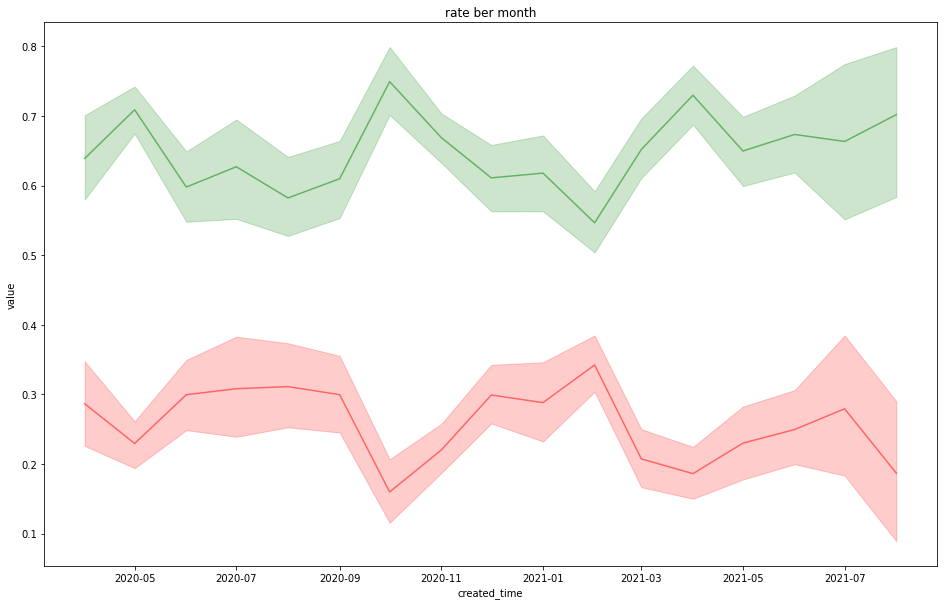

In [66]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=info_df, x="created_time", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=info_df, x="created_time", y="positive", color = "g", alpha = 0.5)
plt.title('rate ber month')
plt.ylabel("value")

## check distripution of rate

c:\users\20812018100700\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'positive rate distripution')

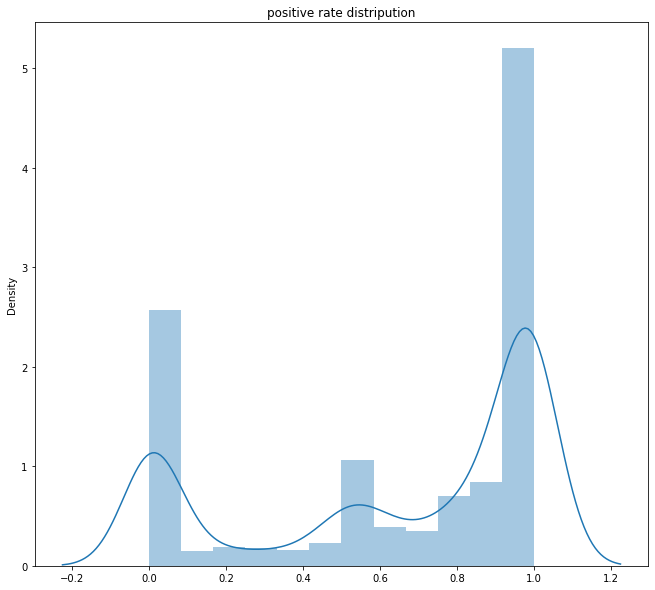

In [79]:
fig, plot = plt.subplots(figsize = (11,10))
plot = sns.distplot(x=info_df["positive"] )
plt.title('positive rate distripution')

c:\users\20812018100700\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


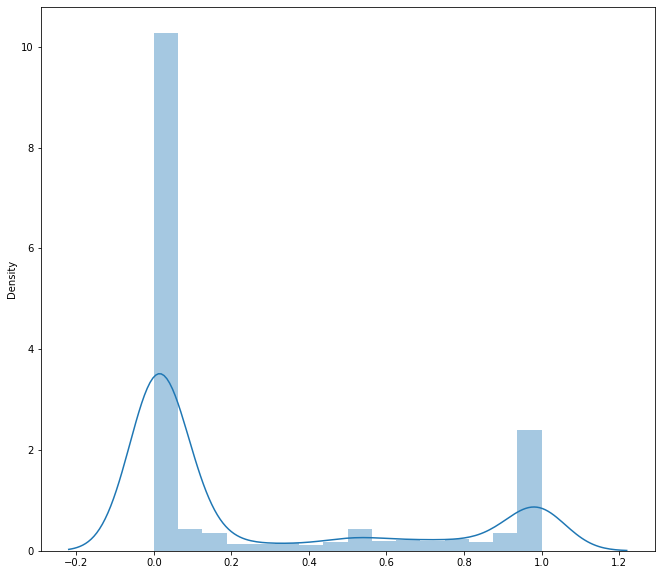

In [80]:
fig, plot = plt.subplots(figsize = (11,10))
plot = sns.distplot(x=info_df["negative"])

In [81]:
info_df.is_human.unique()

array(['F', 'N'], dtype=object)

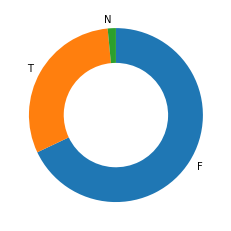

In [82]:
plt.pie(ndf.is_human.value_counts(), labels = ndf.is_human.unique(),
        startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});

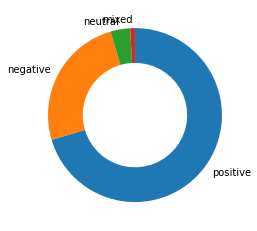

In [83]:
plt.pie(info_df.sentment.value_counts(), labels = info_df.sentment.unique(),
        startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});

In [72]:
colors = sns.color_palette()

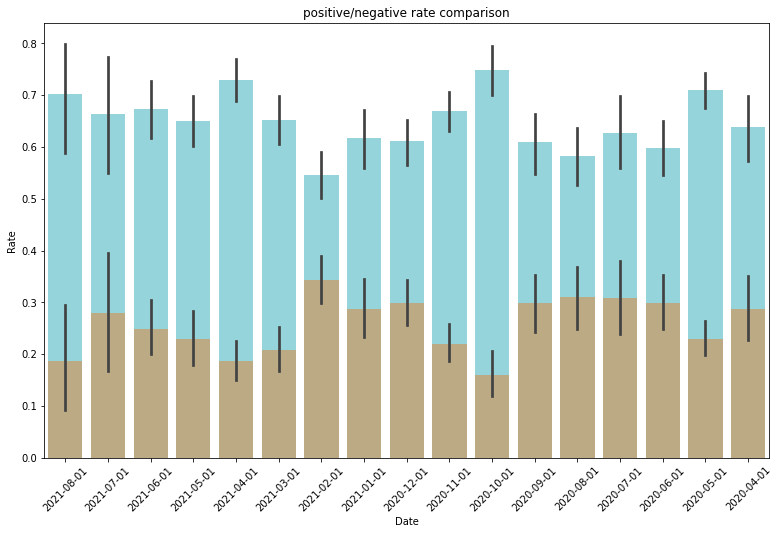

In [89]:
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = info_df, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = info_df, x ="date",  y="negative", color = colors[1], alpha = 0.5)
plt.title("positive/negative rate comparison")
plt.ylabel("Rate")
plt.xlabel("Date")
_ = plt.xticks(rotation=45)

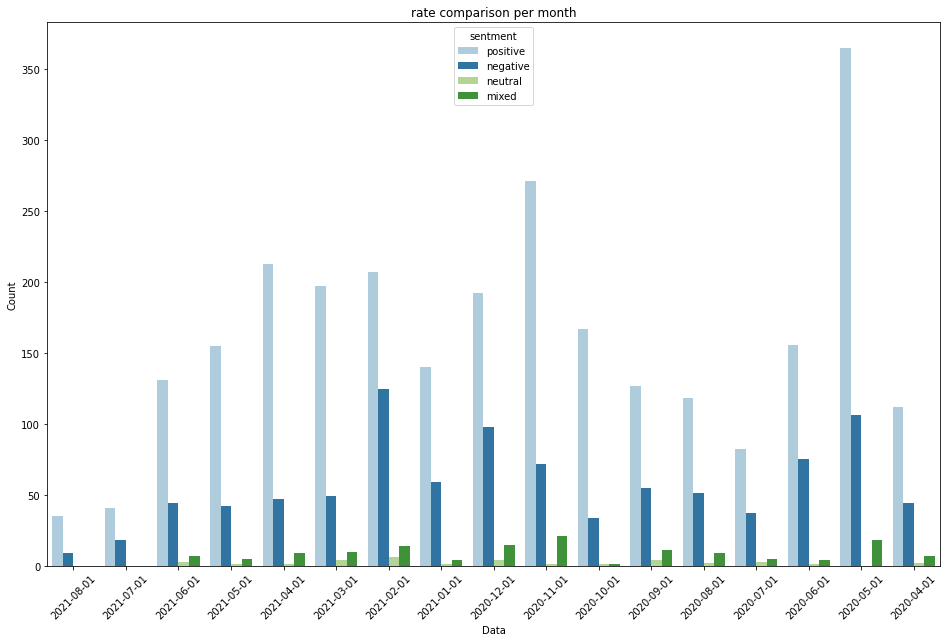

In [92]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = info_df, x ="date",hue = "sentment", palette = 'Paired')
plt.title("rate comparison per month")
plt.xlabel("Data")
plt.ylabel("Count")
_ = plt.xticks(rotation=45)

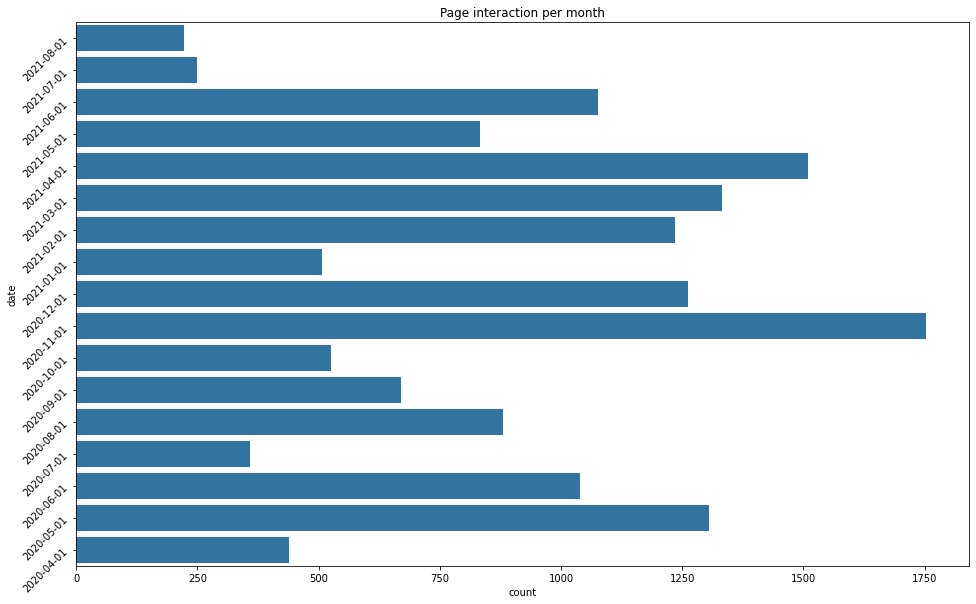

In [99]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = ndf,y = "date", color = colors[0])
plt.title("Page interaction per month")
_ = plt.yticks(rotation=45)

In [76]:
ndf.query('sentment == "mixed"').sample()

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
4570,2021-02-01,المدير - يتعامل مع نظام جامد - قبول الوضع القا...,1754412824720377_1754553194706340,The director - dealing with a rigid system - a...,F,mixed,0.4,0.09,0.51,2021-02-01


In [77]:
ndf.query('sentment == "neutral"').sample()

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
5661,2021-04-01,التفاصيل؟,469987340676764_507787573563407,Details?,F,neutral,0.13,0.82,0.05,2021-04-01
